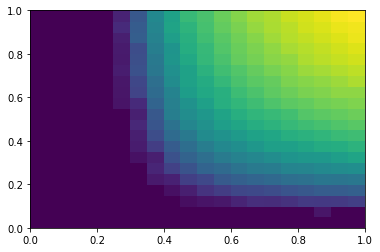

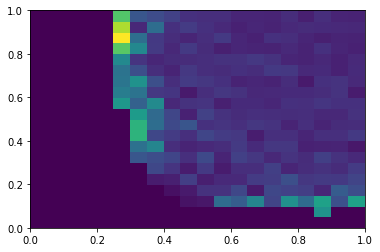

It took: 14.640176208813985 minutes to run


In [1]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()


#Number of Montecarlo sweeps for calculation
sweeps = 100
eqsweeps = 10

#Number of sweeps
N=50


#Generate random initial state
def randominitialstate(N):   
    
    initstate = np.random.randint(-1 , 2 ,size=(N,N))
    return initstate



def nextState(cell):
    
    
    for i in range(N):
        for j in range(N):
            
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)
            
            if cell[a,b] == 0:
            
                if cell[(a+1)%N,b]==-1 or cell[a,(b+1)%N]==-1 or cell[(a-1)%N,b]==-1 or cell[a,(b-1)%N]==-1:
                    if np.random.rand() < float(p1):
                        
                        cell[a,b]=-1
            
            elif cell[a,b] == -1:
                if np.random.rand() < float(p2):
                    cell[a,b] = 1
            
            else:
                if np.random.rand() < float(p3):
                    cell[a,b] = 0
            
            
 
    return cell
            
def NumInfected(cell):

   
    return np.count_nonzero(cell==-1)


p1s=np.linspace(0,1,num=21)
p3s=np.linspace(0,1,num=21)

InfectedAverages=np.zeros((len(p1s),len(p3s)))
InfectedSquaredAverages=np.zeros((len(p1s),len(p3s)))

for a in range(len(p1s)):
    
    p1=p1s[a]
    
    for b in range(len(p3s)):
        
        #p1=p1s[a]
        
        p2=0.5
        
        p3=p3s[b]
        
        
        infe=np.zeros(sweeps)
        cell = randominitialstate(N)
        
        for i in range(eqsweeps):
            cell= nextState(cell)

        for i in range(sweeps):         
            cell = nextState(cell)
            ninfected=NumInfected(cell)
            
            if ninfected != 0:
                
                infe[i]=ninfected

            else:
                infe=np.zeros(sweeps)
                break
          
        InfectedAverages[b][a] = np.average(infe)
        InfectedSquaredAverages[b][a] = np.average(infe**2)
        
        
        
Variance = (InfectedSquaredAverages - (InfectedAverages**2))/(N*N)
VarianceData = pd.DataFrame(Variance)
InfectedData=pd.DataFrame(InfectedAverages/(N*N))
VarianceData.to_csv('VarianceData100.csv',index=False)
InfectedData.to_csv('InfectedData100.csv',index=False)
InfectedDataPlot = pd.read_csv("InfectedData100.csv")
VarianceDataPlot=pd.read_csv("VarianceData100.csv")

plot1=plt.figure(1)
plt.pcolormesh(p1s,p3s,InfectedDataPlot)

plot2=plt.figure(2)
plt.pcolormesh(p1s,p3s,VarianceDataPlot)

plt.show()

print("It took: "+str((time.time()-start_time)/60)+" minutes to run")